In [6]:
from __future__ import print_function, division
from bs4 import BeautifulSoup
import re
import pandas as pd
import random
from ast import literal_eval #string to dict function

# modelling imports
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, accuracy_score, roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler

In [3]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [4]:
import pickle

In [5]:
import requests

requests.__path__

['/Users/noramay/anaconda3/lib/python3.7/site-packages/requests']

In [ ]:
#lecture note: Choose model with care. is it fast? slow? interpretable? accurate?

**Read in and organize dataframes**

In [110]:
scrape_series.replace('N/A',np.nan, inplace = True)

In [11]:
scrape_series.shape

(104423, 22)

In [332]:
#try to use this to get if shows have ended or not, and what country they are from... just USA...
scrape_series.head(30)

,Title,Year,Rated,Released,Runtime,Genre,Director,Writer,Actors,Plot,Language,Country,Awards,imdbRating,imdbVotes,imdbID,totalSeasons
0,Heart of a Samurai,2009–,NaN,01 Jan 2009,NaN,Drama,NaN,NaN,"Satoshi Tsumabuki, Michiko Kichise, Nobuko Miy...",NaN,Japanese,Japan,NaN,8.0,44,tt1050624,1
1,Heart of a Samurai,2009–,NaN,01 Jan 2009,NaN,Drama,NaN,NaN,"Satoshi Tsumabuki, Michiko Kichise, Nobuko Miy...",NaN,Japanese,Japan,NaN,8.0,44,tt1050624,1
2,1989 - Aufbruch ins Ungewisse: Unbekanntes aus...,2009,NaN,17 Mar 2009,45 min,"Documentary, History",Christian Schulz,NaN,"Frank Eigenfeld, Philipp Gabriel, Jürgen Guse,...",NaN,NaN,NaN,NaN,NaN,NaN,tt1397115,NaN
3,Rita & Friends,1994–1996,NaN,NaN,60 min,Music,NaN,NaN,Rita MacNeil,NaN,English,Canada,NaN,NaN,NaN,tt0350449,NaN
4,The Family,2008–,NaN,17 Sep 2008,60 min,Documentary,NaN,NaN,"John Simm, Charlotte Hughes, Emily Hughes, Jan...",NaN,English,UK,4 nominations.,8.3,64,tt1297358,2
5,Angie,1979–1980,NaN,08 Feb 1979,30 min,Comedy,NaN,"Garry Marshall, Dale McRaven, Alan Eisenstock,...","Donna Pescow, Robert Hays, Sharon Spelman, Deb...",Angie Falco is a middle class Italian-American...,English,USA,NaN,6.9,224,tt0078561,2
6,Voice of Firestone Televues,1943–1947,NaN,29 Nov 1943,15 min,NaN,NaN,NaN,NaN,Documentary films on diverse subjects.,English,USA,NaN,NaN,NaN,tt0035599,NaN
7,You Are an Artist,1946–1950,NaN,01 Nov 1946,15 min,NaN,NaN,NaN,Jon Gnagy,Jon Gnagy was a young artist who completed dra...,English,USA,NaN,NaN,NaN,tt0038276,NaN
8,Americana,1947–1949,NaN,08 Dec 1947,30 min,"Family, Game-Show",NaN,NaN,"John Mason Brown, Vivian Ferrer, Dick Dudley, ...",Sponsored by the makers of the Encyclopedia Am...,English,USA,NaN,3.7,6,tt0039120,NaN
9,Birthday Party,1947–1949,NaN,15 May 1947,30 min,Family,NaN,NaN,"Ted Brown, Aunt Grace, Bill Slater",NaN,English,USA,NaN,NaN,NaN,tt0039121,NaN


In [334]:
scrape_series.drop(['totalSeasons'], axis = 1, inplace = True)

In [357]:
.columns

Index(['tconst', 'titleType', 'primaryTitle', 'originalTitle', 'isAdult',
       'startYear', 'endYear', 'runtimeMinutes', 'genres'],
      dtype='object')

In [338]:
region_df.replace("\\N", np.nan, inplace = True)

In [358]:
originals_df = region_df[region_df['isOriginalTitle']==1]

In [362]:
originals_df['parentTconst'] = originals_df['titleId']

/Users/noramay/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [350]:
region_df[region_df['isOriginalTitle'] == 1].language.isna().value_counts()

True     50463
False        3
Name: language, dtype: int64

In [370]:
lds_df = dummyseasondf.merge(originals_df, how='outer', on = 'parentTconst')

In [377]:
region_df['parentTconst'] = region_df['titleId']

(3479773, 8)

In [373]:
dummyseasondf.seasonNumber.isna().value_counts()

False    180842
Name: seasonNumber, dtype: int64

In [374]:
lds_df.seasonNumber.isna().value_counts()

False    180844
True      47381
Name: seasonNumber, dtype: int64

In [342]:
#import imdb dataframe
df = pd.read_csv('title.basics.csv', sep = '\t')

rating_df = pd.read_csv('title.ratings.tsv', sep = '\t')

/Users/noramay/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [13]:
epi_series_df = pd.read_csv('title.episode.tsv', sep = '\t')

In [317]:
region_df = pd.read_csv('title.akas.csv', sep = '\t')

/Users/noramay/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [384]:
econ_df = pd.read_csv('IMDb_Economist_tv_ratings.csv')

In [662]:
aus = region_df[region_df['region'] == 'AU'] 
usa = region_df[region_df['region'] == 'GB'] 
uk = region_df[region_df['region'] == 'US']

In [667]:
countries_df = pd.concat([aus,usa,uk], ignore_index = True)

In [675]:
engl_countries = countries_df[countries_df.types.isna() == True]

In [677]:
engl_countries.columns

Index(['titleId', 'ordering', 'title', 'region', 'language', 'types',
       'attributes', 'isOriginalTitle'],
      dtype='object')

In [679]:
engl_countries.shape

(1164425, 8)

In [380]:
#all available ratings combined with all media types
new_df = df.merge(rating_df, how='outer', on = 'tconst')

In [381]:
#replace their null character with np.nan
new_df.replace('\\N',np.nan, inplace = True)
new_df.sample(1) #example

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes
3550826,tt5278584,tvEpisode,CFNM Corporate Scum Humiliation: Pt. 2,CFNM Corporate Scum Humiliation: Pt. 2,1,2014,NaN,NaN,Adult,NaN,NaN


In [19]:
#df of only episodes
episode_title_df = new_df[new_df['titleType'] == 'tvEpisode']

3846854

In [382]:
#df of only series
series_title_df = new_df[new_df['titleType'] == 'tvSeries']

In [383]:
series_title_df[series_title_df['genres'] == 'Drama']

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes
38462,tt0039123,tvSeries,Kraft Theatre,Kraft Television Theatre,0,1947,1958,60,Drama,8.5,114.0
39349,tt0040021,tvSeries,Actor's Studio,Actor's Studio,0,1948,1950,30,Drama,7.2,51.0
39364,tt0040036,tvSeries,The Chevrolet Tele-Theatre,The Chevrolet Tele-Theatre,0,1948,1950,30,Drama,8.8,24.0
39377,tt0040049,tvSeries,Repertory Theatre,The Philco Television Playhouse,0,1948,1956,60,Drama,8.1,70.0
39379,tt0040051,tvSeries,Studio One in Hollywood,Studio One,0,1948,1958,60,Drama,7.9,185.0
40299,tt0040991,tvSeries,ABC Television Players,ABC Television Players,0,1949,NaN,30,Drama,NaN,NaN
40309,tt0041001,tvSeries,Armchair Detective,Armchair Detective,0,1949,NaN,NaN,Drama,NaN,NaN
40315,tt0041007,tvSeries,The Big Story,The Big Story,0,1949,1959,30,Drama,7.4,22.0
40316,tt0041008,tvSeries,The Black Robe,The Black Robe,0,1949,NaN,NaN,Drama,NaN,NaN
40326,tt0041018,tvSeries,Colgate Theatre,Colgate Theatre,0,1949,1950,30,Drama,NaN,NaN


In [26]:
#episode_title_df[episode_title_df['startYear'] == 1945]

In [33]:
episode_title_df.shape

(3846855, 11)

In [34]:
#df that connects episodes to series
epi_series_df.sample()
epi_series_df.replace('\\N',np.nan, inplace = True)


**Start EDA**

In [9]:
epi_series_df.shape
epi_series_df.dropna(inplace = True)
epi_series_df['seasonNumber'] = epi_series_df['seasonNumber'].astype('int64')
epi_series_df[epi_series_df['seasonNumber'] >= 15].parentTconst.nunique()

1135

In [13]:
epi_series_df.parentTconst.nunique()

104151

In [14]:
#combine episode_title with epi/series to have associated series code
episode_parent_df = episode_title_df.merge(epi_series_df, how='outer', on = 'tconst')

In [15]:
episode_parent_df.shape

(3846866, 14)

In [39]:
#convert numbers to ints instead of strings
episode_parent_df = episode_parent_df.dropna(subset=['seasonNumber'])
episode_parent_df['seasonNumber'] = episode_parent_df['seasonNumber'].astype('int64')
#episode_parent_df[['episodeNumber','startYear','endYear']] = episode_parent_df[['episodeNumber','startYear','endYear']].astype('float64')
episode_parent_df.shape

(2994633, 14)

In [40]:
episode_parent_df['episodeNumber'] = episode_parent_df['episodeNumber'].astype('int64')

In [41]:
episode_parent_df[['startYear','endYear']] = episode_parent_df[['startYear','endYear']].astype('float64')

**Feature Engineering**


In [42]:
#add number of episodes in a season
episode_parent_df['totalSeasons'] = episode_parent_df.groupby('parentTconst')['seasonNumber'].transform('max')
episode_parent_df['epsPerSeason'] = episode_parent_df.groupby(['parentTconst','seasonNumber'])['tconst'].transform('count')
#df.groupby('order')["ext price"].transform('sum')

In [43]:
episode_parent_df.seasonNumber.unique()

array([   1,    3,    2,    4,    5,    6,    9,    8,    7,   10,   11,
         12,   13,   14,   16,   17,   24,   15,   28,   20,   31,   30,
         18,   23,   32,   33,   34,   21,   19,   22,   25,   40,   26,
         27,   39,   29,   38,   44,   47,   36,   45,   37,   41,   35,
         42,   51,   46,   50,   48,   52,   53,   43,   49,   54,   55,
         56,   57,   58,   59,   60,   61,   62,   91,   65,   63,   64,
         66, 2008, 2006,   67,   69,   68,   70,   71,   72, 2012, 2007,
       2011, 2009, 2013, 2010,   73,   74,   76,   75,   77,   84,   79,
         80,  111,   78,  201,   83,   81,   82,   85,   87,   88, 2014,
         90,   89,   86,   92,   93,   94,   95,   96,   97,   98,   99,
        100,  101,  102,  189,  103,  104,  106,  190,  191,  105,  107,
        108, 2015,  110,  109,  112,  113,  114,  115,  116, 2016,  117,
        118,  119,  120,  121,  123,  124,  122,  125,  126,  127,  128,
        129,  130,  131,  132,  133,  134,  135,  1

In [44]:
#aggregate from episode/parent df to create season df
seasondf = (episode_parent_df.groupby(['parentTconst','seasonNumber'], as_index = False)
            .agg({'averageRating':'mean','numVotes':'mean','startYear':'median','totalSeasons':'mean','episodeNumber':'count'}));

In [45]:
#create column that will become my prediction
seasondf['isNextSeason'] = np.where(seasondf['seasonNumber'] != seasondf['totalSeasons'], 1, 0)

In [209]:
seasondf2['isNextSeason'] = np.where(seasondf2['seasonNumber'] != seasondf2['totalSeasons'], 1, 0)

In [46]:
seasondf['tconst'] = seasondf['parentTconst']


,parentTconst,seasonNumber,averageRating,numVotes,startYear,totalSeasons,episodeNumber,isNextSeason,tconst
0,tt0039122,1,NaN,NaN,1947.0,1,4,0,tt0039122
1,tt0039123,1,NaN,NaN,1947.5,11,70,1,tt0039123
2,tt0039123,2,NaN,NaN,1949.0,11,52,1,tt0039123
3,tt0039123,3,NaN,NaN,1950.0,11,53,1,tt0039123
4,tt0039123,4,NaN,NaN,1951.0,11,50,1,tt0039123


In [61]:
seasondf.shape

(180842, 9)

In [16]:
series_title_df.head()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes
34995,tt0035599,tvSeries,Voice of Firestone Televues,Voice of Firestone Televues,0,1943,1947,15,NaN,NaN,NaN
37625,tt0038276,tvSeries,You Are an Artist,You Are an Artist,0,1946,1950,15,NaN,NaN,NaN
38459,tt0039120,tvSeries,Americana,Americana,0,1947,1949,30,"Family,Game-Show",3.3,7.0
38460,tt0039121,tvSeries,Birthday Party,Birthday Party,0,1947,1949,30,Family,NaN,NaN
38461,tt0039122,tvSeries,The Borden Show,The Borden Show,0,1947,NaN,30,"Comedy,Music",NaN,NaN


In [451]:
#add in information about whole series to the indiv. seasons
seasondf2 = seasondf.merge(series_title_df, how='outer', on = 'tconst')

In [452]:
seasondf2.drop('originalTitle', axis = 1, inplace = True)

In [470]:
seasondf2['placeHold'] = np.nan
#seasondf2[seasondf2['endYear'] == np.nan]#, ['placeHold']] = 2020#(seasondf2['startYear_y'] + seasondf2['totalSeasons'])
#seasondf2.endYear[0] == np.nan #head()


In [471]:
seasondf2.loc[seasondf2['endYear'].isna() == True, ['placeHold']] = seasondf2['startYear_y'] + seasondf2['totalSeasons']
seasondf2.loc[seasondf2['placeHold'] < 2018, ['endYear']] = seasondf2['startYear_y'] + seasondf2['totalSeasons']


In [485]:
seasondf2.dropna(subset=['titleType'], inplace = True)

In [ ]:
seasondf2

In [632]:
notOn_df = seasondf2[seasondf2.endYear.isna() == False]
On_df = seasondf2[seasondf2.endYear.isna() == True] #validation set?

dtype('O')

# Work on adding all features to df of only series that have ended

In [633]:
OnCurrentSeason = On_df[On_df.isNextSeason == 0]
OnPastSeason = On_df[On_df.isNextSeason == 1]

In [597]:
OnCurrentSeason

,parentTconst,seasonNumber,averageRating_x,numVotes_x,startYear_x,totalSeasons,episodeNumber,isNextSeason,tconst,titleType,primaryTitle,isAdult,startYear_y,endYear,runtimeMinutes,genres,firstSeason,placeHold
3409,tt0063951,49.0,8.200000,10389.000000,2018.0,49.0,11.0,0,tt0063951,tvSeries,Sesame Street,0.0,1969.0,NaN,55,"Animation,Comedy,Family",1.0,2018.0
3601,tt0065323,49.0,8.300000,1228.000000,2018.0,49.0,17.0,0,tt0065323,tvSeries,NFL Monday Night Football,0.0,1970.0,NaN,NaN,Sport,1.0,2019.0
4105,tt0068120,47.0,7.700000,2874.000000,2018.0,47.0,89.0,0,tt0068120,tvSeries,The Price Is Right,0.0,1972.0,NaN,60,"Family,Game-Show",1.0,2019.0
4361,tt0069629,46.0,6.800000,179.000000,2018.0,46.0,26.0,0,tt0069629,tvSeries,Sesamstraße,0.0,1973.0,NaN,30,"Animation,Comedy,Family",1.0,2019.0
4713,tt0072506,44.0,5.000000,1109.000000,2019.0,44.0,13.0,0,tt0072506,tvSeries,Good Morning America,0.0,1975.0,NaN,120,"News,Talk-Show",1.0,2019.0
4851,tt0072562,44.0,6.300000,177.181818,2018.0,44.0,11.0,0,tt0072562,tvSeries,Saturday Night Live,0.0,1975.0,NaN,90,"Comedy,Music",1.0,2019.0
4922,tt0072584,36.0,6.800000,2191.000000,2018.0,36.0,100.0,0,tt0072584,tvSeries,Wheel of Fortune,0.0,1983.0,NaN,30,"Family,Game-Show",1.0,2019.0
5260,tt0075474,47.0,7.540000,6.600000,2018.0,47.0,8.0,0,tt0075474,tvSeries,The Old Fox,0.0,1977.0,NaN,60,"Crime,Drama",1.0,2024.0
5744,tt0077076,44.0,7.600000,5.000000,2019.0,44.0,15.0,0,tt0077076,tvSeries,SOKO 5113,0.0,1978.0,NaN,50,"Crime,Drama",1.0,2022.0
5797,tt0077082,44.0,6.900000,110.000000,2018.0,44.0,1.0,0,tt0077082,tvSeries,The South Bank Show,0.0,1978.0,NaN,53,Documentary,1.0,2022.0


In [100]:
seasondf2 = seasondf2.dropna(subset=['parentTconst'])

In [454]:
#after merging series info with seasons, apply the overall series rating, if missing for series
seasondf2['averageRating_x'].fillna(seasondf2['averageRating_y'], inplace=True)
seasondf2['numVotes_x'].fillna(seasondf2['numVotes_y'], inplace=True)

In [455]:
seasondf2.drop(['averageRating_y','numVotes_y'], axis = 1, inplace = True)

In [78]:
#deal with country??
scrape_series.Country.value_counts()

USA                                                                     37631
UK                                                                      10229
N/A                                                                      5806
Japan                                                                    4888
Canada                                                                   4064
Germany                                                                  3692
Spain                                                                    3093
Australia                                                                2739
Russia                                                                   1842
France                                                                   1784
Greece                                                                   1504
Mexico                                                                   1459
India                                                           

In [456]:
seasondf2[['startYear_y','endYear']] = seasondf2[['startYear_y','endYear']].astype('float64')

In [464]:
seasondf2[['parentTconst','startYear_y','endYear','totalSeasons']].sample(20)


,parentTconst,startYear_y,endYear,totalSeasons
173742,tt8502098,2017.0,2017.0,3.0
116163,tt3458586,2013.0,NaN,1.0
90857,tt2016632,2011.0,2011.0,1.0
160084,tt6915068,2017.0,NaN,1.0
169672,tt7983796,2018.0,NaN,1.0
89049,tt1935598,2011.0,NaN,7.0
154496,tt6368552,2003.0,NaN,16.0
152495,tt6218564,2016.0,NaN,2.0
68217,tt1182856,2006.0,NaN,11.0
20869,tt0178132,2000.0,NaN,11.0


In [465]:
seasondf2.loc[seasondf2['seasonNumber'] >= 2000 , ['totalSeasons']] = seasondf2['totalSeasons'] - seasondf2['startYear_y']


In [466]:
seasondf2.loc[seasondf2['seasonNumber'] >= 2000 , ['seasonNumber']] = seasondf2['seasonNumber'] - seasondf2['startYear_y']

In [467]:
seasondf2.loc[seasondf2['seasonNumber'] >= 174, ['totalSeasons']] = seasondf2['totalSeasons'] - seasondf2['firstSeason']

(array([4.00000e+00, 1.01075e+05, 2.62070e+04, 1.38050e+04, 8.48300e+03,
        5.97600e+03, 4.29900e+03, 3.27200e+03, 2.57300e+03, 2.05100e+03,
        1.67800e+03, 1.34000e+03, 1.11400e+03, 9.38000e+02, 8.04000e+02,
        6.88000e+02, 6.11000e+02, 5.11000e+02, 4.61000e+02, 7.76000e+02]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
        13., 14., 15., 16., 17., 18., 19., 20.]),
 <a list of 20 Patch objects>)

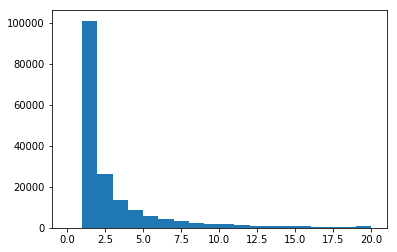

In [208]:
plt.hist(seasondf2.seasonNumber, bins=20, range = (0,20))

In [ ]:
#add rating for overall series if missing it for season? CHEQUE
#dummify genres, even if multiple CHEQUE
#simplify for only those that are "Drama" or something CHEQUE
#run it on shows that are currently on, and we dont know if they are continuing or not for a validation set? maybe already in there on imdb...


In [244]:
seasondf2['isAdult'].fillna(0.0, inplace=True)

In [250]:
seasondf2['genres'].replace(['nan'],['other'], inplace=True)

In [233]:
seasondf2['genres'] = seasondf2['genres'].apply((lambda x: x.split(',')))

In [634]:
def dummyGenres(df):
    df['genres'].replace(np.nan,'other', inplace=True)
    df['genres'] = df['genres'].apply((lambda x: x.split(',')))
    s = [set(i) for i in df['genres']]
    cats = list(set.union(*s))
    catlist = list(set([cat.strip() for cat in cats]))
    dummydf = pd.DataFrame(columns = catlist)
    dummydf['genres'] = df['genres'].values
    for cat in catlist:
        dummydf[cat] = dummydf['genres'].apply(lambda x: cat in x).astype(int)
    return dummydf


In [593]:
#OnPastSeason['genres'].replace(np.nan,['other'], inplace=True)
On_df['genres'] = On_df['genres'].apply((lambda x: x.split(',')))

AttributeError: 'list' object has no attribute 'split'

In [516]:
On_df.genres.isna().value_counts()

False    39738
Name: genres, dtype: int64

In [635]:
dummyOn_df = dummyGenres(On_df)
dummyNotOn_df = dummyGenres(notOn_df)
dummyOnCurrentSeason = dummyGenres(OnCurrentSeason)
dummyOnPastSeason = dummyGenres(OnPastSeason)

/Users/noramay/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [639]:
OnPastSeason.reset_index(inplace=True)

In [625]:
dummyOnCurrentSeason = OnCurrentSeason.merge(dummyOnCurrentSeason, left_index = True, right_index = True)

In [640]:
dummyOn_df = On_df.merge(dummyOn_df, left_index = True, right_index = True)
dummyNotOn_df = notOn_df.merge(dummyNotOn_df, left_index = True, right_index = True)
dummyOnCurrentSeason = OnCurrentSeason.merge(dummyOnCurrentSeason, left_index = True, right_index = True)
dummyOnPastSeason = OnPastSeason.merge(dummyOnPastSeason, left_index = True, right_index = True)
#dummyNotOn_df = pd.concat([notOn_df,dummyNotOn_df],axis=1,ignore_index=True)
#dummyOnCurrentSeason = pd.concat([OnCurrentSeason,dummyOnCurrentSeason],axis=1,ignore_index=True)
#dummyOnPastSeason = pd.concat([OnPastSeason,dummyOnPastSeason],axis=1,ignore_index=True)

In [696]:
#parentTconst must be in engl_countries
dummyOn_df['engl'] = dummyOn_df['parentTconst'].isin(set(engl_countries['titleId']))
dummyNotOn_df['engl'] = dummyNotOn_df['parentTconst'].isin(set(engl_countries['titleId']))
dummyOnCurrentSeason['engl'] = dummyOnCurrentSeason['parentTconst'].isin(set(engl_countries['titleId']))
dummyOnPastSeason['engl'] = dummyOnPastSeason['parentTconst'].isin(set(engl_countries['titleId']))

In [697]:
dummyOn_df = dummyOn_df[dummyOn_df['engl'] == True]
dummyNotOn_df = dummyNotOn_df[dummyNotOn_df['engl'] == True]
dummyOnCurrentSeason = dummyOnCurrentSeason[dummyOnCurrentSeason['engl'] == True]
dummyOnPastSeason = dummyOnPastSeason[dummyOnPastSeason['engl'] == True]

In [698]:
dummyOn_df = dummyOn_df[dummyOn_df['isAdult'] == 0.0]
dummyNotOn_df = dummyNotOn_df[dummyNotOn_df['isAdult'] == 0.0]
dummyOnCurrentSeason = dummyOnCurrentSeason[dummyOnCurrentSeason['isAdult'] == 0.0]
dummyOnPastSeason = dummyOnPastSeason[dummyOnPastSeason['isAdult'] == 0.0]

In [701]:
dummyOnPastSeason.shape

(13322, 49)

In [ ]:
dummyOn_df = pd.concat([On_df,dummyOn_df],axis=1,ignore_index=True)
dummyNotOn_df = pd.concat([notOn_df,dummyNotOn_df],axis=1,ignore_index=True)
dummyOnCurrentSeason = pd.concat([OnCurrentSeason,dummyOnCurrentSeason],axis=1,ignore_index=True)
dummyOnPastSeason = pd.concat([OnPastSeason,dummyOnPastSeason],axis=1,ignore_index=True)

In [702]:
dummyOn_df['runtimeMinutes'] = dummyOn_df.runtimeMinutes.astype('float64')
dummyNotOn_df['runtimeMinutes'] = dummyNotOn_df.runtimeMinutes.astype('float64')
dummyOnCurrentSeason['runtimeMinutes'] = dummyOnCurrentSeason.runtimeMinutes.astype('float64')
dummyOnPastSeason['runtimeMinutes'] = dummyOnPastSeason.runtimeMinutes.astype('float64')

In [703]:
dummyOn_df.runtimeMinutes.fillna(45,inplace = True)
dummyNotOn_df.runtimeMinutes.fillna(45,inplace = True)
dummyOnCurrentSeason.runtimeMinutes.fillna(45,inplace = True)
dummyOnPastSeason.runtimeMinutes.fillna(45,inplace = True)

In [704]:
with open('dummyOn_df.pkl', 'wb') as picklefile:
    pickle.dump(dummyOn_df, picklefile)
with open('dummyNotOn_df.pkl', 'wb') as picklefile:
    pickle.dump(dummyNotOn_df, picklefile)
with open('dummyOnCurrentSeason.pkl', 'wb') as picklefile:
    pickle.dump(dummyOnCurrentSeason, picklefile)
with open('dummyOnPastSeason.pkl', 'wb') as picklefile:
    pickle.dump(dummyOnPastSeason, picklefile)

In [283]:
seasondf2.shape

(180842, 17)

False    25140
True        36
Name: startYear_y, dtype: int64

In [643]:
dummydf.shape

(180842, 29)

In [287]:
dummyseasondf = pd.concat([seasondf2,dummydf],axis=1)

In [299]:
dummyseasondf.drop('firstSeason', axis=1, inplace =True);
dummyseasondf.drop('genres', axis=1, inplace = True);

In [294]:
dummyseasondf.runtimeMinutes = dummyseasondf.runtimeMinutes.astype('float64')

In [295]:
dummyseasondf.runtimeMinutes.fillna(dummyseasondf.runtimeMinutes.mean(),inplace = True)

In [316]:
scrape_series.Year.isna().value_counts()
#scrape_series['StartYear'] = scrape_series['Year'].str.split('-')[0]
#try:
#    scrape_series['StartYear'] = str(scrape_series['Year']).str.split('-')[1]
#except ['ValueError','IndexError']:
#    scrape_series['StartYear'] = np.nan

False    104423
Name: Year, dtype: int64

In [391]:
seasondf.startYear.isna().value_counts()

False    173740
True       7102
Name: startYear, dtype: int64

In [300]:
with open('dummyseasondf.pkl', 'wb') as picklefile:
    pickle.dump(dummyseasondf, picklefile)

In [468]:
with open('seasondf2.pkl', 'wb') as picklefile:
    pickle.dump(seasondf2, picklefile)

In [57]:
with open('seasondf.pkl', 'wb') as picklefile:
    pickle.dump(seasondf, picklefile)

In [ ]:
with open('episode_parent_df.pkl', 'wb') as picklefile:
    pickle.dump(episode_parent_df, picklefile)

In [ ]:
with open('series_title_df.pkl', 'wb') as picklefile:
    pickle.dump(series_title_df, picklefile)

In [ ]:
with open('episode_title_df.pkl', 'wb') as picklefile:
    pickle.dump(episode_title_df, picklefile)

In [ ]:
with open('epi_series_df.pkl', 'wb') as picklefile:
    pickle.dump(epi_series_df, picklefile)

In [461]:
with open('seasondf2.pkl', 'rb') as picklefile:
    seasondf2 = pickle.load(picklefile)

In [18]:
with open('dummyseasondf.pkl', 'rb') as picklefile:
    dummyseasondf = pickle.load(picklefile)
with open('seasondf2.pkl', 'rb') as picklefile:
    seasondf2 = pickle.load(picklefile)
with open('seasondf.pkl', 'rb') as picklefile:
    seasondf = pickle.load(picklefile)
with open('episode_parent_df.pkl', 'rb') as picklefile:
    episode_parent_df = pickle.load(picklefile)
with open('series_title_df.pkl', 'rb') as picklefile:
    series_title_df = pickle.load(picklefile)
with open('episode_title_df.pkl', 'rb') as picklefile:
    episode_title_df = pickle.load(picklefile)
with open('epi_series_df.pkl', 'rb') as picklefile:
    epi_series_df= pickle.load(picklefile)
with open('my_data_tvseries.pkl', 'rb') as picklefile:
    scrape_series= pickle.load(picklefile)